In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
xls = pd.ExcelFile('cust_journey/fin_dist.xlsx')

### Reading sheet 1

In [4]:
sheet1 = xls.parse(0)
sheet1.head(20)

,Building,Month,Year,Category,Tenant,Cat_Sales,Lease_Sales,Cat_Groc,Lease_Groc,Cat_Sales_PSF,Lease_Sales_PSF,Cat_GLA,Lease_GLA
0,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,"Childrens Place, The",1504219.33,296994.16,31.99,53.12,84.9217,61.1854,17713,4854
1,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gap Kids,1504219.33,653492.57,31.99,27.67,84.9217,97.7550,17713,6685
2,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Gymboree,1504219.33,186516.43,31.99,29.38,84.9217,115.9207,17713,1609
3,Yorkdale Shopping Centre,11,2017,Children & Infants Apparel,Kids Foot Locker,1504219.33,367216.17,31.99,26.15,84.9217,80.4416,17713,4565
4,Yorkdale Shopping Centre,11,2017,Electronics,Apple,16325073.58,11782680.00,7.82,2.76,478.7832,1169.0326,34097,10079
5,Yorkdale Shopping Centre,11,2017,Electronics,Bell Mobility,16325073.58,327854.75,7.82,35.89,478.7832,180.3381,34097,1818
6,Yorkdale Shopping Centre,11,2017,Electronics,Best Buy Mobile,16325073.58,435730.62,7.82,14.62,478.7832,406.0863,34097,1073
7,Yorkdale Shopping Centre,11,2017,Electronics,Bose,16325073.58,178446.12,7.82,15.50,478.7832,133.1687,34097,1340
8,Yorkdale Shopping Centre,11,2017,Electronics,EB Games,16325073.58,303262.59,7.82,17.10,478.7832,276.6994,34097,1096
9,Yorkdale Shopping Centre,11,2017,Electronics,Freedom Mobile,16325073.58,123215.07,7.82,42.68,478.7832,100.6659,34097,1224


In [5]:
sheet1.describe()
sheet1.columns

Index(['Building', 'Month', 'Year', 'Category', 'Tenant', 'Cat_Sales',
       'Lease_Sales', 'Cat_Groc', 'Lease_Groc', 'Cat_Sales_PSF',
       'Lease_Sales_PSF', 'Cat_GLA', 'Lease_GLA'],
      dtype='object')

In [6]:
testdf = sheet1.groupby(['Month','Tenant'])[['Lease_Sales']].sum().reset_index()
testdf

,Month,Tenant,Lease_Sales
0,11,A & W,193734.83
1,11,Aldo,628042.67
2,11,Aldo Accessories,129977.34
3,11,Alex and Ani,117753.02
4,11,AllSaints,780444.24
5,11,Amaya,119000.00
6,11,American Eagle Outfitters,576842.68
7,11,Ann Taylor,287768.39
8,11,Anthropologie,425270.30
9,11,Apple,11782680.00


In [7]:
testdf.set_index('Lease_Sales', inplace=True)

In [8]:
testdf.sort_index(ascending=True, inplace=True)

In [9]:
newone= testdf.reset_index()
newone2 = newone[350:]

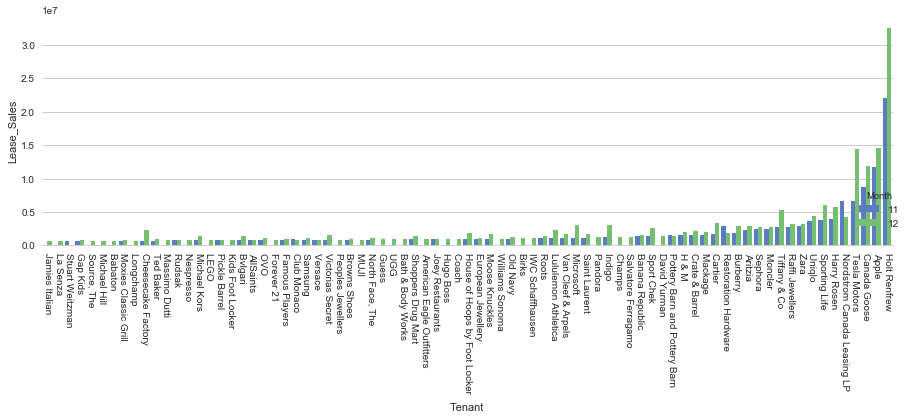

In [10]:
import seaborn as sns
sns.set(style="whitegrid")
g = sns.factorplot(x="Tenant", y="Lease_Sales", hue="Month", data=newone2,
                   size=6, kind="bar", palette="muted", aspect=2)
g.despine(left=True)
g.set_xticklabels(rotation=-90)
g.set_ylabels("Lease_Sales")
plt.tight_layout()
plt.savefig('Top_sales_stores', dpi=300, edgecolor='w',bbox_inches="tight")
plt.show()